<a href="https://colab.research.google.com/github/pragyapragati/wine-reviews/blob/master/winereviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files


In [0]:
uploaded = files.upload()

Saving winemag-data-130k-v2.csv to winemag-data-130k-v2 (1).csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "winemag-data-130k-v2.csv" with length 52908706 bytes


In [0]:
uploaded

In [0]:
import io

In [0]:
df1 = pd.read_csv(io.StringIO(uploaded['winemag-data-130k-v2.csv'].decode('utf-8')))
print(df1)

        Unnamed: 0      country  \
0                0        Italy   
1                1     Portugal   
2                2           US   
3                3           US   
4                4           US   
5                5        Spain   
6                6        Italy   
7                7       France   
8                8      Germany   
9                9       France   
10              10           US   
11              11       France   
12              12           US   
13              13        Italy   
14              14           US   
15              15      Germany   
16              16    Argentina   
17              17    Argentina   
18              18        Spain   
19              19           US   
20              20           US   
21              21           US   
22              22        Italy   
23              23           US   
24              24        Italy   
25              25           US   
26              26        Italy   
27              27  

In [0]:
uploaded = files.upload()

Saving winemag-data_first150k.csv to winemag-data_first150k.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "winemag-data_first150k.csv" with length 49784334 bytes


In [0]:
uploaded

In [0]:
import io

In [0]:
df1 = pd.read_csv(io.StringIO(uploaded['winemag-data_first150k.csv'].decode('utf-8')))
print(df1)

        Unnamed: 0      country  \
0                0           US   
1                1        Spain   
2                2           US   
3                3           US   
4                4       France   
5                5        Spain   
6                6        Spain   
7                7        Spain   
8                8           US   
9                9           US   
10              10        Italy   
11              11           US   
12              12           US   
13              13       France   
14              14           US   
15              15           US   
16              16           US   
17              17        Spain   
18              18       France   
19              19           US   
20              20           US   
21              21        Spain   
22              22        Spain   
23              23           US   
24              24           US   
25              25  New Zealand   
26              26           US   
27              27  

In [0]:
uploaded = files.upload()

Saving winemag-data-130k-v2.json to winemag-data-130k-v2.json


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "winemag-data-130k-v2.json" with length 79279294 bytes


In [0]:
uploaded

In [0]:
import io

In [0]:
df1 = pd.read_json(io.StringIO(uploaded['winemag-data-130k-v2.json'].decode('utf-8')))
print(df1)

            country                                        description  \
0             Italy  Aromas include tropical fruit, broom, brimston...   
1          Portugal  This is ripe and fruity, a wine that is smooth...   
2                US  Tart and snappy, the flavors of lime flesh and...   
3                US  Pineapple rind, lemon pith and orange blossom ...   
4                US  Much like the regular bottling from 2012, this...   
5             Spain  Blackberry and raspberry aromas show a typical...   
6             Italy  Here's a bright, informal red that opens with ...   
7            France  This dry and restrained wine offers spice in p...   
8           Germany  Savory dried thyme notes accent sunnier flavor...   
9            France  This has great depth of flavor with its fresh ...   
10               US  Soft, supple plum envelopes an oaky structure ...   
11           France  This is a dry wine, very spicy, with a tight, ...   
12               US  Slightly reduced,

In [0]:

%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import csv
from textblob import TextBlob
import pandas as pd
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import os
from os.path import join
import datetime as dt
from scipy.stats.stats import pearsonr
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import StratifiedKFold
import itertools
from scipy.stats import kendalltau
import random
import nltk
random.seed(123)

In [0]:

plt.style.use('ggplot')

In [0]:
data = pd.read_csv('winemag-data_first150k.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


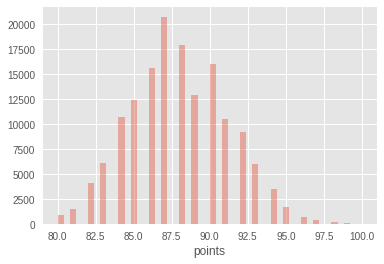

In [0]:
sns.distplot(data.points, kde=False)

In [0]:
def GoodRating(row):
    if row['points'] >= 96:
        val = 5
    else:
        val = 0
    return(val)
data['Good'] = data.apply(GoodRating, axis=1)
data.head()
#data.shape (15k,12)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,Good
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,5
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,5
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,5
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,5
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


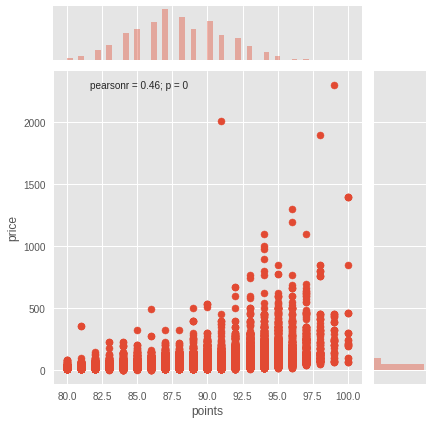

In [0]:
sns.jointplot(x='points', y='price', data=data)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


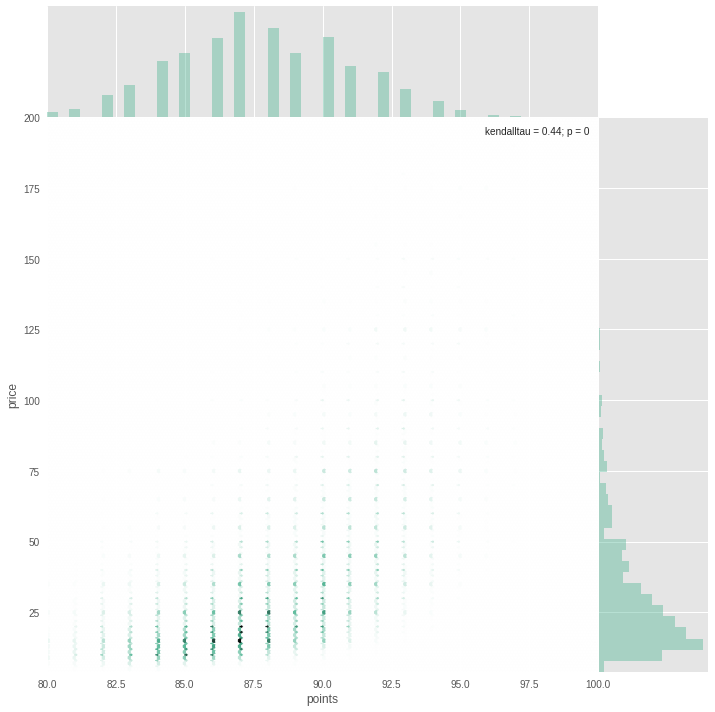

In [0]:
a = data
a = a[a.price <= 200]
sns.jointplot(x='points',y='price',stat_func=kendalltau,kind="hex", color="#4CB391",space=0,size=10,data=a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


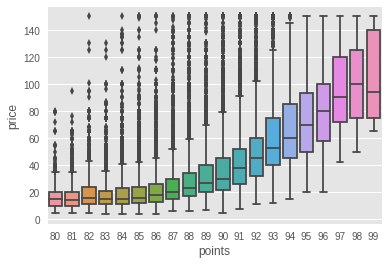

In [0]:
a = data[data.price <= 150][data.points < 100]
sns.boxplot(x = 'points', y = 'price', data = a)

In [1]:
wines = data.pivot_table(values='points',index=['variety'],columns=['country'],aggfunc='mean')
wines.head()
sns.heatmap(wines)

NameError: ignored

In [0]:
df = data.sample(n=9000)
df = df[['description','Good']]
df.head()

,description,Good
23633,"Spunky and bright in terms of its aromatics, w...",0
140949,"The fruit is precise and fine-tuned, showing n...",0
76664,Calcareous's regular Viognier and Chardonnay a...,0
53541,Castello di Semivicoli is a thick and succulen...,0
32442,"A spark of flint leaps out of the glass, follo...",0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


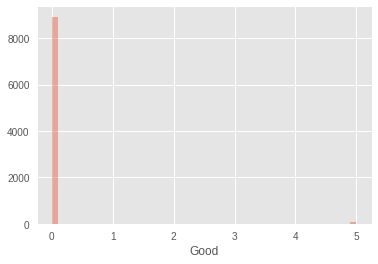

In [0]:
sns.distplot(df.Good, kde=False)

In [0]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

for word in ['walking', 'walks', 'walked']:
    print(wnl.lemmatize(word))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
walking
walk
walked


In [0]:
def split_into_lemmas(message):
    message = str(message).lower()
    words = TextBlob(message).words
    return [word.lemma for word in words]

BOW_transform = CountVectorizer(analyzer=split_into_lemmas).fit(df['description'])

In [0]:
BOW = BOW_transform.transform(df['description'])

In [0]:
tfidf_BOW = TfidfTransformer().fit(BOW)

In [0]:
print('inverse document frequnency of the word "to" is:', tfidf_BOW.idf_[BOW_transform.vocabulary_['fruit']])

inverse document frequnency of the word "to" is: 1.90948139396831


In [0]:
converted_messages = tfidf_BOW.transform(BOW)

In [0]:
t1 = dt.datetime.now()
spam_detector = MultinomialNB().fit(converted_messages, df['Good'])
t2 = dt.datetime.now()
print('total time taken in training:', (t2-t1))

total time taken in training: 0:00:00.013805


In [0]:
#print('predicted:', spam_detector.predict(tfidf_BOW.transform(BOW[120]))[0])
#print('expected:', df['Good'][120])

In [0]:
target = np.array(df['Good'].tolist())
y = np.array([0, 0, 1, 1])
features = converted_messages
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(target, target)

5

In [0]:
true_ = []
pred_ = []
StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(target,target):
    spam_detector = MultinomialNB().fit(converted_messages[train_index], target[train_index])
    predict = spam_detector.predict(converted_messages[test_index])
    true_.append(target[test_index])
    pred_.append(predict)

In [0]:
TrueLabel = list(itertools.chain(*true_))
PredictedLabel = list(itertools.chain(*pred_))

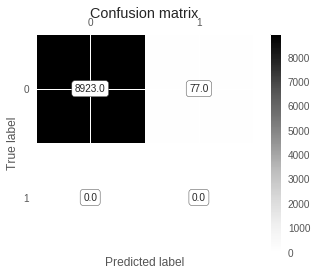

In [0]:
cm = confusion_matrix(PredictedLabel, TrueLabel)
fig, ax = plt.subplots()
im = ax.matshow(cm)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
    
plt.title('Confusion matrix')
fig.colorbar(im)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
TrueLabel = [1 if x==1 else 0 for x in TrueLabel]
PredictedLabel = [1 if x==1 else 0 for x in PredictedLabel]
print(PredictedLabel)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
print('Correlation between the actual and prediction is:', pearsonr(TrueLabel, PredictedLabel)[0], 'with p-value',  ("%.2f" % pearsonr(TrueLabel, PredictedLabel)[1]))


Correlation between the actual and prediction is: nan with p-value 1.00


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [0]:
target_names = ['Good Wine', 'Bad Wine']
print(classification_report(TrueLabel, PredictedLabel, target_names=target_names))

ValueError: ignored

In [0]:
print('Area under the curve (AUC) is:', roc_auc_score(TrueLabel, PredictedLabel))

ValueError: ignored

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(TrueLabel, PredictedLabel)
roc_auc = auc(false_positive_rate, true_positive_rate)

ValueError: ignored

NameError: ignored

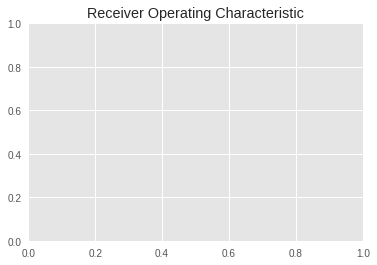

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Lots of code from
#https://github.com/shubhabrataroy/Thinkful/blob/master/Curriculum/SpamFilter.ipynb

In [0]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,Good
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,5
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,5
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,5
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,5
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,0


In [0]:
good = data[data.Good == 1]
bad = data[data.Good == 0]

goodString = ' '.join(good['description'].tolist()).lower()
badString = ' '.join(bad['description'].tolist()).lower()
goodTokens = nltk.tokenize.word_tokenize(goodString)
badTokens = nltk.tokenize.word_tokenize(badString)

goodDist = nltk.FreqDist(goodTokens)
badDist = nltk.FreqDist(badTokens)

stopwords = nltk.corpus.stopwords.words('english')

good_filter = lambda goodDist, stopwords: dict( (word,goodDist[word]) for word in goodDist if word not in stopwords )
good_word_freq = dict_filter(goodDist, stopwords)

bad_filter = lambda goodDist, stopwords: dict( (word,badDist[word]) for word in badDist if word not in stopwords )
bad_word_freq = dict_filter(badDist, stopwords)

Good = pd.DataFrame(list(good_word_freq.items()))
Good.columns = ['word','count']
Bad = pd.DataFrame(list(bad_word_freq.items()))
Bad.columns = ['word','count']

Good.sort_values('count',ascending=False).head(20)

LookupError: ignored

In [0]:
Bad.sort_values('count',ascending=False).head(20)

NameError: ignored

In [0]:
from sklearn.tree import DecisionTreeClassifier

def QualityRating(row):
    if row['points'] >= 90:
        val = 1
    else:
        val = 0
    return(val)

wine_df = data
wine_df=wine_df.loc[wine_df.country=='US',['points','price','region_1', 'variety','winery']]
wine_df=wine_df.dropna(axis=0,how='any')
wine_df['point_bins'] = data.apply(QualityRating,axis=1)

wine_df['is_train'] = np.random.uniform(0, 1, len(wine_df)) <= .25
wine_train, wine_test = wine_df[wine_df['is_train']==True], wine_df[wine_df['is_train']==False]

In [0]:

# Train classification tree
x = wine_train.loc[:,['price','regn_enc','var_enc','wnry_enc']]
y = wine_train['point_bins']
min_samp_split = 2                           
clf = DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf = clf.fit(x,y)

# Report classification results.  training dataset first, then test.  
# BASELINE - all features, no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'regn_enc','var_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   ',clf.n_features_,' features out of: 4 features')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


ValueError: ignored

In [0]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
df['species'] = pd.Categorical(iris.target, iris.target_names)
df.head()

train, test = df[df['is_train']==True], df[df['is_train']==False]

features = df.columns[:4]
clf = RandomForestClassifier(n_jobs=2)
y, _ = pd.factorize(train['species'])
clf.fit(train[features], y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Values and categories have different dtypes. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: None of the categories were found in values. Did you mean to use
'Categorical.from_codes(codes, categories)'?
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_train,species
0,5.1,3.5,1.4,0.2,True,NaN
1,4.9,3.0,1.4,0.2,True,NaN
2,4.7,3.2,1.3,0.2,True,NaN
3,4.6,3.1,1.5,0.2,True,NaN
4,5.0,3.6,1.4,0.2,True,NaN


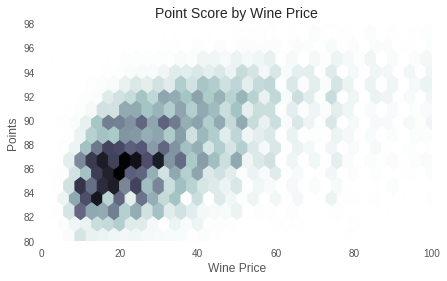

ValueError: ignored

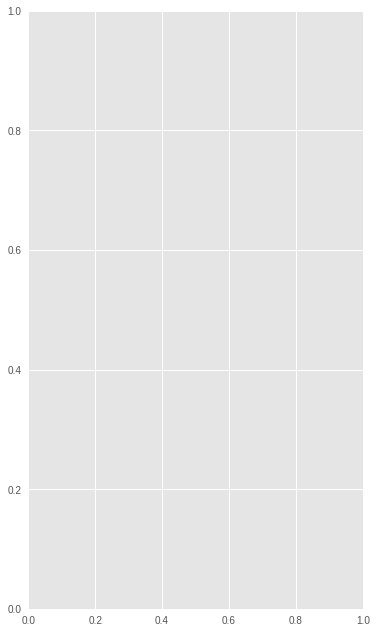

In [0]:
# From https://github.com/dasotelo/Python_Projects/blob/master/Wine_classify.py
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Read in & munge wine information dataset.  US wines only
wine_df=pd.read_csv('winemag-data_first150k.csv')
wine_df=wine_df.loc[wine_df.country=='US',['points','price','region_1', \
    'variety','winery']]
wine_df=wine_df.dropna(axis=0,how='any')

# Hexbin of points on price
plt.figure(figsize=(7,4))
plt.hexbin(wine_df.price,wine_df.points,cmap='bone_r',gridsize=35,
    extent=(0,100,73,115))
plt.xlim(0,100)
plt.ylim(80,98)
plt.title('Point Score by Wine Price',size=14)
plt.ylabel('Points')
plt.xlabel('Wine Price')
plt.show()

# Violin plot of points on region - use regions with 50 or more wines only
vio_dfm=wine_df.loc[:,['region_1','points']].groupby('region_1').median()
vio_dfm.reset_index(inplace=True)
vio_df=wine_df.loc[:,['region_1','points']].groupby('region_1').count()
vio_df.reset_index(inplace=True)
vio_df=vio_df.merge(vio_dfm,'inner',left_on='region_1',right_on='region_1')
vio_df=vio_df.sort_values('points_y',ascending=False)
vio_df=vio_df.loc[vio_df.points_x>=50,:]
vio_df=vio_df.iloc[0:30,0]
vio_df2=[wine_df.loc[wine_df.region_1==j,['points']] for j in vio_df.values]

plt.figure(figsize=(6,11))
parts=plt.violinplot(vio_df2,vert=False,showextrema=False,showmedians=True)
for pc in parts['bodies']:
    pc.set_edgecolor('black')
    pc.set_alpha(0.3)
    pc.set_facecolor('green')
plt.yticks(np.arange(30,0,-1),vio_df.values)
plt.title('Distribution of Point Scores by Top Regions',size=14)
plt.ylabel('Top 30 Regions by Median Point Score, >50 Wines per Region')
plt.xlabel('Points')
plt.show()

# Map point values to categories
bin_map={
    100:'90+',
    99:'90+',
    98:'90+',
    97:'90+',
    96:'90+',
    95:'90+',
    94:'90+',
    93:'90+',
    92:'90+',
    91:'90+',
    90:'90+',
    89:'<90',
    88:'<90',
    87:'<90',
    86:'<90',
    85:'<90',
    84:'<90',
    83:'<90',
    82:'<90',
    81:'<90',
    80:'<90',
    79:'<90',
    78:'<90',
    77:'<90',
    76:'<90'}
wine_df['point_bins']=wine_df.points.map(bin_map)
wine_df.point_bins.unique() # Ensure no records are un-binned
wine_df=wine_df.drop('points',axis=1)

# Split into 50/50 train/test datasets
wine_train,wine_test=train_test_split(wine_df,test_size=0.15)

# Prepare train data for classification tree
regn_lab=LabelEncoder().fit(np.unique(wine_df.region_1.values))
var_lab=LabelEncoder().fit(np.unique(wine_df.variety.values))
wnry_lab=LabelEncoder().fit(np.unique(wine_df.winery.values))
wine_train['regn_enc']=regn_lab.transform(wine_train.region_1)
wine_train['var_enc']=var_lab.transform(wine_train.variety)
wine_train['wnry_enc']=wnry_lab.transform(wine_train.winery)
wine_train=wine_train.drop(['region_1','variety','winery'],axis=1)

# Prepare test data for classification tree
wine_test['regn_enc']=regn_lab.transform(wine_test.region_1)
wine_test['var_enc']=var_lab.transform(wine_test.variety)
wine_test['wnry_enc']=wnry_lab.transform(wine_test.winery)
wine_test=wine_test.drop(['region_1','variety','winery'],axis=1)

# Train classification tree
x=wine_train.loc[:,['price','regn_enc','var_enc','wnry_enc']]
y=wine_train['point_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Report classification results.  training dataset first, then test.  
# BASELINE - all features, no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'regn_enc','var_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   ',clf.n_features_,' features out of: 4 features')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

# Report feature importance
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('Feature importance for max_leaves model')
print(pd.DataFrame([clf.feature_importances_],columns=x.columns.values))

# Train classification tree - remove varietal information
x=wine_train.loc[:,['price','regn_enc','wnry_enc']]
y=wine_train['point_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Report classification results.  train first, then test.  
# Varietal information removed - no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'regn_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   Varietal information removed')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

# Train classification tree - remove region information
x=wine_train.loc[:,['price','var_enc','wnry_enc']]
y=wine_train['point_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Report classification results.  train first, then test.  
# Region information removed - no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'var_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   Region information removed')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

# Train classification tree - remove varietal & region information
x=wine_train.loc[:,['price','wnry_enc']]
y=wine_train['point_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Report classification results.  train first, then test.  
# Varietal & region information removed - no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   Varietal & Region information removed')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

# Re-train with 4 features
x=wine_train.loc[:,['price','regn_enc','var_enc','wnry_enc']]
y=wine_train['point_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Create dataframe object to record results of tree termination tests
# using model trained with all 4 features
results4=pd.DataFrame([],columns=list(['n_leaves','train_acc','test_acc']))
bench_nodes=clf.tree_.node_count
for i in np.arange(bench_nodes,500,-100):
    print(i)
    min_samp_split=2                           
    clf=DecisionTreeClassifier(min_samples_split=min_samp_split,
        max_features=None,max_leaf_nodes=i)
    clf=clf.fit(x,y)
    train_error=y==clf.predict(x)
    test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'regn_enc','var_enc','wnry_enc']])
    run_rslt=pd.DataFrame([[i,sum(train_error)/len(train_error),
        sum(test_error)/len(test_error)]],
        columns=list(['n_leaves','train_acc','test_acc']))
    results4=results4.append(run_rslt)
    
for i in np.arange(500,0,-10):
    print(i)
    min_samp_split=2                           
    clf=DecisionTreeClassifier(min_samples_split=min_samp_split,
        max_features=None,max_leaf_nodes=i)
    clf=clf.fit(x,y)
    train_error=y==clf.predict(x)
    test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'regn_enc','var_enc','wnry_enc']])
    run_rslt=pd.DataFrame([[i,sum(train_error)/len(train_error),
        sum(test_error)/len(test_error)]],
        columns=list(['n_leaves','train_acc','test_acc']))
    results4=results4.append(run_rslt)
    # Re-train with 2 features
x=wine_train.loc[:,['price','wnry_enc']]
y=wine_train['point_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Create dataframe object to record results of tree termination tests
# using model trained with price and winery only
results2=pd.DataFrame([],columns=list(['n_leaves','train_acc','test_acc']))
bench_nodes=clf.tree_.node_count
for i in np.arange(bench_nodes,500,-100):
    print(i)
    min_samp_split=2                           
    clf=DecisionTreeClassifier(min_samples_split=min_samp_split,
        max_features=None,max_leaf_nodes=i)
    clf=clf.fit(x,y)
    train_error=y==clf.predict(x)
    test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'wnry_enc']])
    run_rslt=pd.DataFrame([[i,sum(train_error)/len(train_error),
        sum(test_error)/len(test_error)]],
        columns=list(['n_leaves','train_acc','test_acc']))
    results2=results2.append(run_rslt)
    
for i in np.arange(500,0,-10):
    print(i)
    min_samp_split=2                           
    clf=DecisionTreeClassifier(min_samples_split=min_samp_split,
        max_features=None,max_leaf_nodes=i)
    clf=clf.fit(x,y)
    train_error=y==clf.predict(x)
    test_error=wine_test['point_bins']==clf.predict(wine_test.loc[:,['price', \
    'wnry_enc']])
    run_rslt=pd.DataFrame([[i,sum(train_error)/len(train_error),
        sum(test_error)/len(test_error)]],
        columns=list(['n_leaves','train_acc','test_acc']))
    results2=results2.append(run_rslt)
    
    
# Plot resulting train & test accuracy rates for max_leaves runs
plt.figure(figsize=(8,5))
plt.plot(results4.n_leaves,results4.train_acc,linewidth=2
    ,label='train data, 4 features')
plt.plot(results4.n_leaves,results4.test_acc,linewidth=2
    ,label='test data, 4 features')
plt.plot(results2.n_leaves,results2.train_acc,linewidth=2,linestyle='--'
    ,label='train data, 2 features')
plt.plot(results2.n_leaves,results2.test_acc,linewidth=2,linestyle='--'
    ,label='test data, 2 features')
plt.title('Classification Accuracy for n Leaf Models',size=14)
plt.ylabel('Classification Accuracy')
plt.xlabel('n_max_leaves')
plt.legend()